In [1]:
%load_ext autoreload
%autoreload 2

In [116]:
import numpy as np
import pandas as pd
import cvxpy as cp
import gym
import matplotlib.pyplot as plt
from numpy.linalg import LinAlgError
import gurobipy
import seaborn as sns

import sys
sys.path.append('./asebo/')
sys.path.append('./rl/')
from optimizers import Adam
from worker import worker, get_policy
from es import ES

from methods import Gradient_LP, Hessian_LP, Hessian_LP_structured, \
                    get_PTinverse, run_HessianES, aggregate_rollouts_hessianES,\
                    run_asebo, gradient_antithetic_estimator, invHessian_LP_structured_PTinv_estimator,\
                    invHessian_identity_estimator

## Training

In [142]:
########### Setting up params ##########
params = {
# 'env_name': 'Swimmer-v2',
# 'env_name': 'HalfCheetah-v2',
# 'env_name': 'InvertedPendulum-v2',
# 'env_name': 'InvertedDoublePendulum-v2',
'env_name': 'Reacher-v2',
# 'env_name': 'Hopper-v2',
'steps':1000,
'h_dim':16,
'start':0,
'max_iter':200,
'seed':0,
'k':140, # ASEBO only?
'num_sensings':25,
'log':False,
'linear':True,
'threshold':0.995,
'decay':0.99,
'learning_rate':0.05,#0.05
'filename':'',
'policy':'Linear', # Linear or Toeplitz
'shift':0,
'min':10,
'sigma':1e-1,
'backtracking':True,
'alpha': 1e-6,
'beta': 0.5
}



gradient_estimator = gradient_antithetic_estimator


# invhessian_estimator = invHessian_LP_structured_PTinv_estimator

invhessian_estimator =  invHessian_identity_estimator
params['filename'] = "identity"

In [143]:
########### Auto Param Setups ##########

env = gym.make(params['env_name'])
params['ob_dim'] = env.observation_space.shape[0]
params['ac_dim'] = env.action_space.shape[0]
params['k'] += -1
# params['alpha'] = 1 # ASEBO only
params['zeros'] = False
master = get_policy(params)
if params['log']:
    params['num_sensings'] = 4 + int(3 * np.log(master.N))
if params['linear']:
    params['num_sensings'] = int(2 * master.N)
    

params['dir'] = params['env_name'] + params['policy'] + '_h' + str(params['h_dim']) + '_lr' + str(params['learning_rate']) + '_num_sensings' + str(params['num_sensings']) +'_' + params['filename']

## Train

In [ ]:
master = get_policy(params)

params['learning_rate'] = 1
ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master)

# params['learning_rate'] = 0.05
# ts, rewards, master = run_asebo(params, master)

Policy Dimension:  22
Iteration: 1, Leanring Rate: 0.5, Rollouts: 88, Reward: -2014.8528960736112, Samples: 44
Iteration: 2, Leanring Rate: 0.25, Rollouts: 176, Reward: -2001.8020703784318, Samples: 44
Iteration: 3, Leanring Rate: 0.03125, Rollouts: 264, Reward: -1658.3845944874672, Samples: 44
Iteration: 4, Leanring Rate: 0.000244140625, Rollouts: 352, Reward: -1657.4999281453397, Samples: 44
Iteration: 5, Leanring Rate: 0.015625, Rollouts: 440, Reward: -1645.9632410628985, Samples: 44
Iteration: 6, Leanring Rate: 0.0625, Rollouts: 528, Reward: -1607.9574724149768, Samples: 44
Iteration: 7, Leanring Rate: 6.103515625e-05, Rollouts: 616, Reward: -1605.5987882934517, Samples: 44
Iteration: 8, Leanring Rate: 9.5367431640625e-07, Rollouts: 704, Reward: -1601.3266614716767, Samples: 44
Iteration: 9, Leanring Rate: 0.0009765625, Rollouts: 792, Reward: -1598.4563429951531, Samples: 44


## Save and Plot

In [15]:
# np.save("./data/{}/asebo_params.npy".format(params['dir']), master.params)
# np.save("./data/{}/asebo_ts.npy".format(params['dir']), ts)
# np.save("./data/{}/asebo_rs.npy".format(params['dir']), rewards)


In [137]:
title = "Swimmer-v2"
asebo_df = pd.read_csv("./data/Swimmer-v2Linear_h16_lr0.05_num_sensings125_/Seed0.csv")
hessian_df = pd.read_csv("./data/Swimmer-v2Linear_h16_lr1_num_sensings125__hessianES/Seed0.csv")

title = "InvertedPendulum-v2"
asebo_df = pd.read_csv("./data/InvertedPendulum-v2Linear_h16_lr1_num_sensings25__asebo/Seed0.csv")
hessian_df = pd.read_csv("./data/InvertedPendulum-v2Linear_h16_lr1_num_sensings25__hessianES/Seed0.csv")

title = "Hopper-v2"
asebo_df = pd.read_csv("./data/Hopper-v2Linear_h16_lr0.05_num_sensings66__asebo/Seed0.csv")
hessian_df = pd.read_csv("./data/Hopper-v2Linear_h16_lr1_num_sensings66__hessianES/Seed0.csv")

title = "Reacher-v2"
asebo_df = pd.read_csv("./data/Reacher-v2Linear_h16_lr0.05_num_sensings44__asebo/Seed0.csv")
hessian_df = pd.read_csv("./data/Reacher-v2Linear_h16_lr0.05_num_sensings44__hessianES/Seed0.csv")

title = "HalfCheetah-v2"
asebo_df = pd.read_csv("./data/HalfCheetah-v2Linear_h16_lr0.05_num_sensings204__asebo/Seed0.csv")
hessian_df = pd.read_csv("./data/HalfCheetah-v2Linear_h16_lr1_num_sensings204__hessianES/Seed0.csv")

title = "InvertedDoublePendulum-v2"
asebo_df = pd.read_csv("./data/InvertedDoublePendulum-v2Linear_h16_lr0.05_num_sensings22__asebo/Seed0.csv")
hessian_df = pd.read_csv("./data/InvertedDoublePendulum-v2Linear_h16_lr1_num_sensings22__hessianES/Seed0.csv")


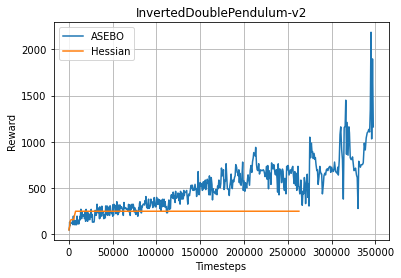

In [138]:
# plt.plot(asebo_ts, asebo_rewards, label="ASEBO")
# plt.plot(lpgrad_ts, lpgrad_rewards, label="LP gradient")

sns.lineplot(data=asebo_df, x="Timesteps", y="Reward", label="ASEBO")
sns.lineplot(data=hessian_df, x="Timesteps", y="Reward", label="Hessian")
plt.grid()
plt.title(title)
plt.savefig("./plots/%s.png" % title)


# Testing

In [ ]:
master = get_policy(params)
master.params=np.load("./data/{}_hessian.npy".format(params['dir']))
test_policy = worker(params, master, np.zeros([1, master.N]), 0)


In [ ]:
from gym.wrappers import Monitor
env = Monitor(gym.make(params['env_name']), './video', force=True)
env._max_episode_steps = params['steps']

In [ ]:
def play(env, worker):
    state = env.reset()
    while 1:
        action = worker.policy.evaluate(state)
        action = np.clip(action, worker.env.action_space.low[0], worker.env.action_space.high[0])
        action = action.reshape(len(action), )
        state, reward, done, info = env.step(action)
        env.render()
        if done: 
            break

In [ ]:
play(env, test_policy)

In [ ]:
np.save("./data/{}_hessian_ts.npy".format(params['dir']), ts)
np.save("./data/{}_hessian_rs.npy".format(params['dir']), rewards)

In [ ]:
!open .
